#### Описание

Этот набор данных предоставляет всесторонний обзор различных факторов, влияющих на уровень счастья в разных странах мира. Он включает информацию о ВВП, продолжительности жизни, отношению к коррупции, свободу выбора и щедрость людей за 2019 год.

### Подключение модулей

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Отключим предупредения
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Загрузка данных

In [40]:
df_whr = pd.read_csv("WHR_2019.csv")
df_whr.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [42]:
df_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       156 non-null    object 
 1   region                        156 non-null    object 
 2   happiness_score               156 non-null    float64
 3   gdp_per_capita                156 non-null    float64
 4   social_support                156 non-null    float64
 5   healthy_life_expectancy       156 non-null    float64
 6   freedom_to_make_life_choices  156 non-null    float64
 7   generosity                    156 non-null    float64
 8   perceptions_of_corruption     156 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.1+ KB


#### Описание данных

- **country** - Название страны.
- **region** - Географический регион.
- **happiness_score** - Показатель, отражающий общее состояние счастья.
- **gdp_per_capita** - Мера ВВП на душу населения
- **social_support** - Метрика, измеряющая соц. поддержку
- **healthy_life_expectancy** - Показатель ожидаемой продолжительности жизни
- **freedom_to_make_life_choices** - Мера свободы в жизненном выборе.
- **generosity** - Показатель, отражающий щедрость.
- **perceptions_of_corruption** - Мера, восприятия коррупции в стране.

Размерность набора данных(датасета): 156 наблюдений и 9 признаков. В наборе данных отсутствуют пропущенные значения.

In [60]:
df_whr.shape

(156, 9)

In [62]:
df_whr.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,156,155,Cyprus,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,156,10,Sub-Saharan Africa,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
happiness_score,156.0,NaN,NaN,NaN,5.407096,1.11312,2.853,4.5445,5.3795,6.1845,7.769
gdp_per_capita,156.0,NaN,NaN,NaN,0.905147,0.398389,0.0,0.60275,0.96,1.2325,1.684
social_support,156.0,NaN,NaN,NaN,1.208814,0.299191,0.0,1.05575,1.2715,1.4525,1.624
healthy_life_expectancy,156.0,NaN,NaN,NaN,0.725244,0.242124,0.0,0.54775,0.789,0.88175,1.141
freedom_to_make_life_choices,156.0,NaN,NaN,NaN,0.392571,0.143289,0.0,0.308,0.417,0.50725,0.631
generosity,156.0,NaN,NaN,NaN,0.184846,0.095254,0.0,0.10875,0.1775,0.24825,0.566
perceptions_of_corruption,156.0,NaN,NaN,NaN,0.110603,0.094538,0.0,0.047,0.0855,0.14125,0.453


In [64]:
df_whr.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [66]:
df_whr.describe(include='object')

,country,region
count,156,156
unique,155,10
top,Cyprus,Sub-Saharan Africa
freq,2,40


In [108]:
df_whr.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

Данные находятся в пределах нормы.

## Предобработка данных

In [106]:
# Проверка на дублирующие записи
df_whr.duplicated().sum()

0

In [310]:
# Проверка на пустые записи
for col in df_whr.columns:
    print(f'Процент пропусков в колонке {col} = {df_whr[col].isna().sum()/df_whr.shape[0] * 100:.2f} % ')

Процент пропусков в колонке country = 0.00 % 
Процент пропусков в колонке region = 0.00 % 
Процент пропусков в колонке happiness_score = 0.00 % 
Процент пропусков в колонке gdp_per_capita = 0.00 % 
Процент пропусков в колонке social_support = 0.00 % 
Процент пропусков в колонке healthy_life_expectancy = 0.00 % 
Процент пропусков в колонке freedom_to_make_life_choices = 0.00 % 
Процент пропусков в колонке generosity = 0.00 % 
Процент пропусков в колонке perceptions_of_corruption = 0.00 % 


## Разведочный анализ данных

### Плотность распределения данных

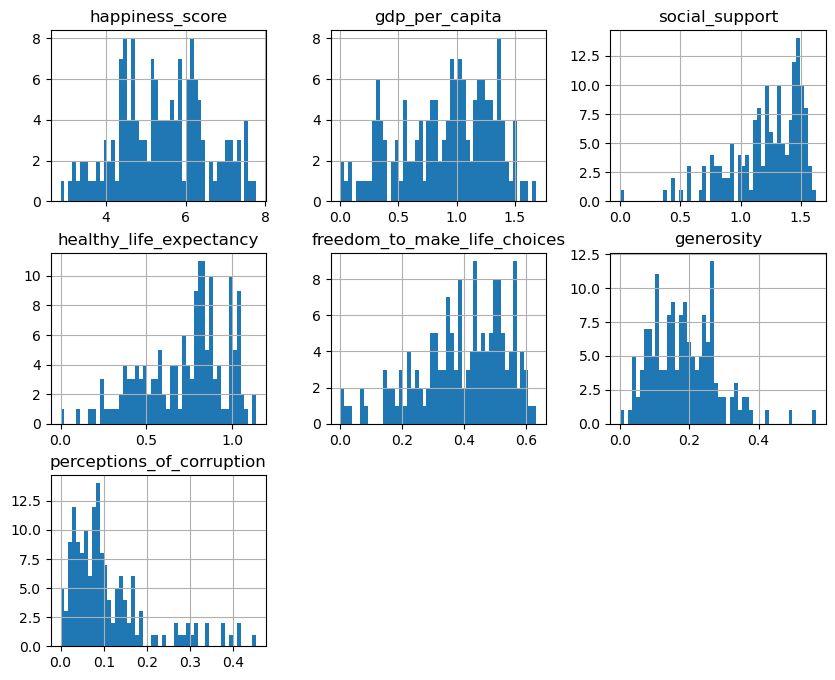

In [257]:
df_whr.hist(figsize=(10, 8), bins=50);

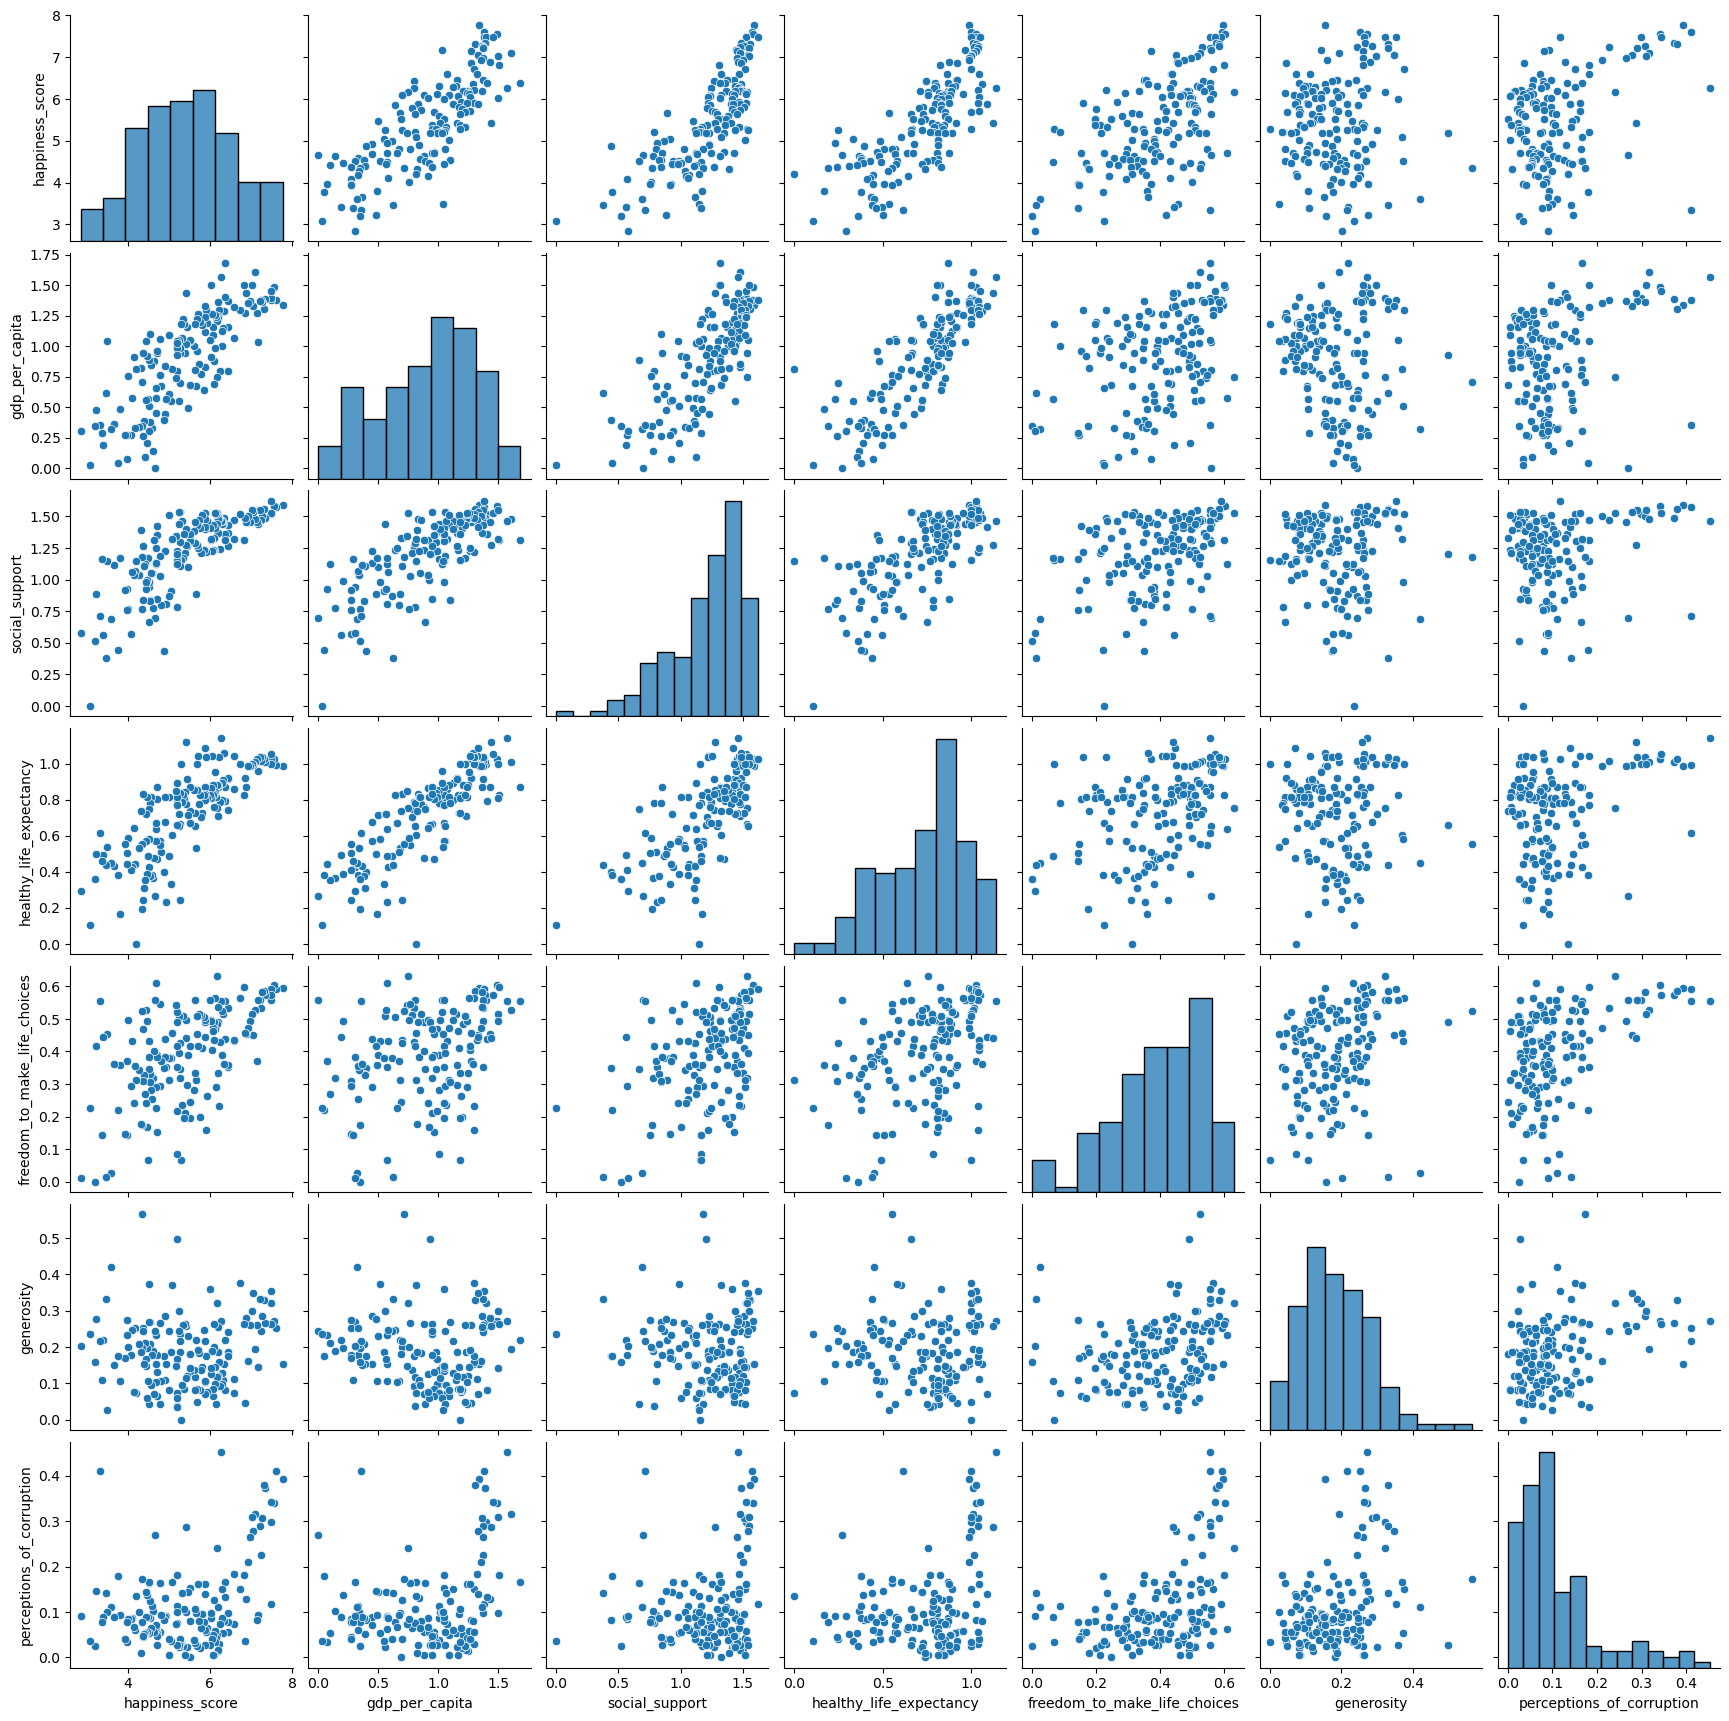

In [250]:
sns.pairplot(df_whr);

Наблюдается 


Сильная зависимость между признаками: gdp_per_capita, healthy_life_expectancy, social_support, happiness_score.


Небольшая зависимость между признаками: freedom_to_make_life_choices и gdp_per_capita, healthy_life_expectancy, social_support, happiness_scor, perceptions_of_corruption; 

In [117]:
df_whr[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']].corr()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
gdp_per_capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
social_support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
healthy_life_expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
freedom_to_make_life_choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
perceptions_of_corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<Axes: >

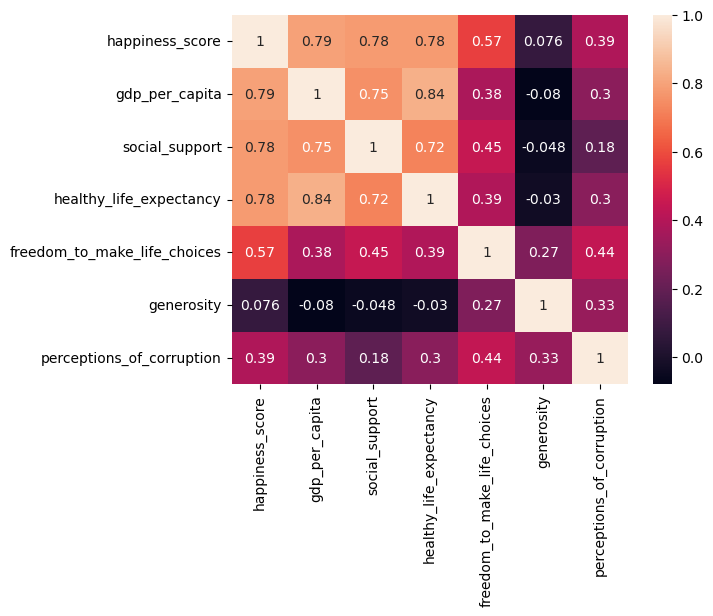

In [82]:
sns.heatmap(df_whr[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']].corr(), annot=True)

### Дополнительные исследования

In [297]:
# Самая счастливая страна
most_happy_country = df_whr.loc[df_whr['happiness_score'].idxmax()]
most_happy_country['country']

'Finland'

In [295]:
# Самая несчастливая страна
min_happy_country = df_whr.loc[df_whr['happiness_score'].idxmin()]
min_happy_country['country']

'South Sudan'

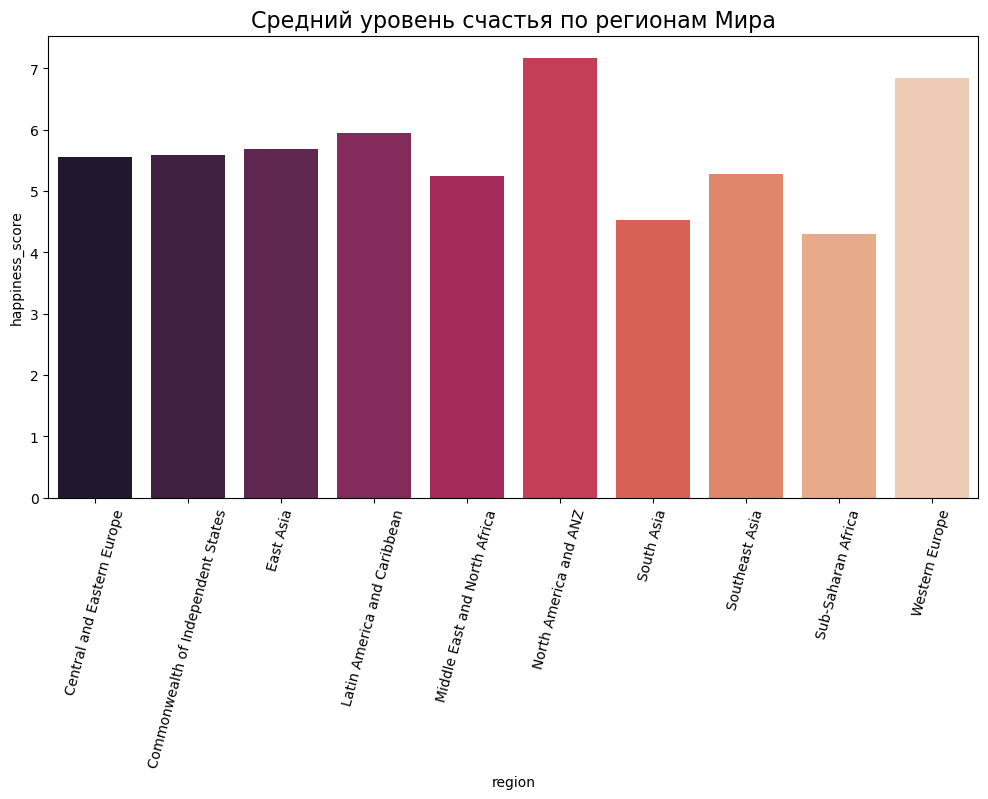

In [289]:
average_happiness = df_whr.groupby('region')['happiness_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=average_happiness, x='region', y='happiness_score', palette='rocket')
plt.title('Средний уровень счастья по регионам Мира', fontsize=16)
plt.xticks(rotation=75);

### Общий вывод


1. Был загружен набор данных. Первые наблюдения показали, что в наборе данных нет пропусков и аномальных значений. Статистика показала, что значения во всех признаках находятся в пределах нормы.
2. Проведена предобработка данных.
3. Проведен разведочный анализ данных. Наблюдается 
Сильная зависимость между признаками: gdp_per_capita, healthy_life_expectancy, social_support и happiness_score.
Небольшая зависимость между признаками: perceptions_of_corruption и happiness_score;

 
На уровень счастья людей в разных странах сильно влияют: ВВП на душу населения, продолжительность жизни и социальная поддержка. Менее значительно влияет мера восприятия коррупции.

Самая счастливая страна и регион за 2019 год - Финляндия и Северная Америка соответсвенно.

Самые несчастливые - Южный Судан и Африка: регион пустыни Сахара